<a href="https://colab.research.google.com/github/heyad/Teaching/blob/master/CV/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision and OpenCV

Recall that we can treat an image as a two-dimensional array, where each element in the array represents a color value. A binary image has only two colors (black and white), while a more common image is the grayscale images (256 levels of gray), values range between 0 (black) to 255 white. Recall also that for a color-images, we have three channels for Red, Green and Blue, each is also a 2D array with values ranging between 0 to 255. 

In this tutorial, we will cover the following topics:

* Extract and represent features from images 
* Linear filters 
* Median filters 
* Image sharpening 
* Gradient images 


In [ ]:
# load the required libraries
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image


In [ ]:
# First, you need to mount your drive (where you store the data)
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load/ Explore Image
* Once you mounted your gdrive, your files should be under /content/gdrive/My Drive/. Notice that this is why the path for my files here are slightly different from the lab document in the class (which assumes you access  the files from your local drive)
* The below code loads an image and returns the size of the image which is (667, 1000, 3). The number 3 denotes the number of channels in the image (red, green, and blue).

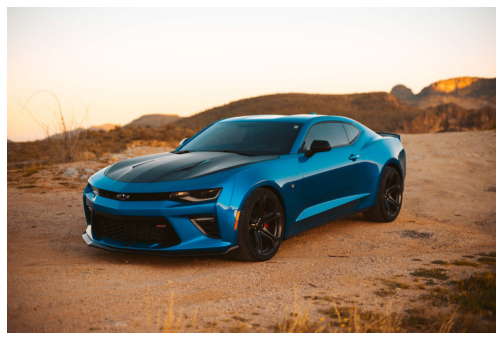

In [ ]:
# load an image into memory 
# The image below is obtained from Google images
image = Image.open('/content/gdrive/My Drive/Data/cars.jpeg')
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(image)

In [ ]:
# convert the image into an array
image_arr = np.array(image)
# check the array shape
image_arr.shape


(667, 1000, 3)

One good way to explore images is to look at the color distribution in the image. This can be achieved by calculating the frequency of various color intensities using histogram. The code below plots the histogram of the image above: 

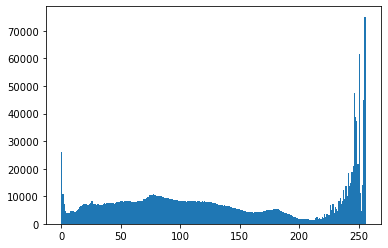

In [ ]:
# the ravel function returns continous 1 d array containing all intensity values of the image pixels
plt.hist(image_arr.ravel(),256,[0,256]);
plt.show()

You can check OpenCV documents for more information about histograms at [https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)

You can also find the histogram (color distribution) for each channel in the image. Recall an RGB image is made of three channels representing the three different colors (R, G, B)

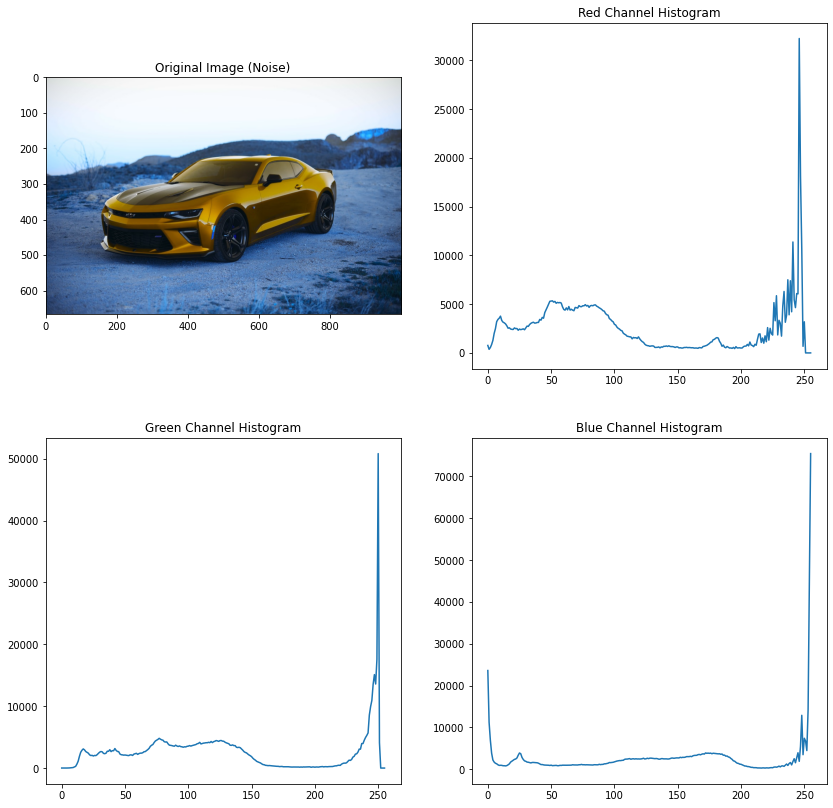

In [ ]:
image = cv.imread('/content/gdrive/My Drive/Data/cars.jpeg')

# Calculate histogram for the  three channels
hist1 = cv.calcHist([image],[0],None,[256],[0,256])
hist2 = cv.calcHist([image],[1],None,[256],[0,256])
hist3 = cv.calcHist([image],[2],None,[256],[0,256])

# show original image
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(221)
plt.imshow(image)

# Red

ax2 = fig.add_subplot(222)
plt.plot(hist1)

# Green
ax3 = fig.add_subplot(223)
plt.plot(hist2)

# Blue


ax4 = fig.add_subplot(224)
plt.plot(hist3)
ax1.title.set_text('Original Image (Noise)')
ax2.title.set_text('Red Channel Histogram')
ax3.title.set_text('Green Channel Histogram')
ax4.title.set_text('Blue Channel Histogram')
plt.show()

## Process Images 

### Color spaces 

It should be noted that there are various color representations for images, and it is possible to convert from one color space to another. However, because of the scope of this course, we will only focus on grayscale and RGB images. We showed last week that you can convert an RGB image to a grayscale one as below:

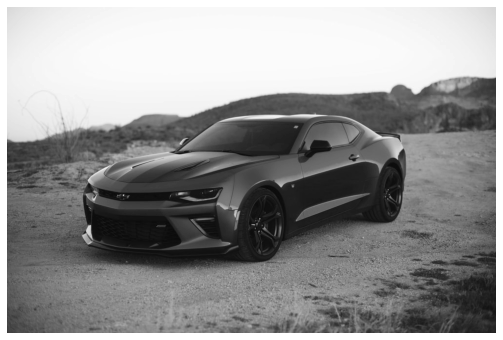

In [ ]:
gray = cv.cvtColor(image_arr,cv.COLOR_BGR2GRAY)
#show the gray image
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(gray,cmap='gray')

## Transforming and Image

Image transformation involves translation, rotation, magnification, or shear of an image. If $(x,y)$ is the coordinate of the pixel of an image, then the transformed coordinate $(u,v)$ of the new pixel can be represented as follows: 

$$\begin{bmatrix} u \\ v \\1 \end{bmatrix}=\begin{bmatrix} c_{11} & c_{12} & c_{13} \\ c_{21} & c_{22} & c_{23} \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\1 \end{bmatrix}$$

Setting the constant values of the matrix above controls the type and value of the transformation of the image. For example, to translate the image by 10, the above matrix would be as follows: 



$$\begin{bmatrix} u \\ v \\1 \end{bmatrix}=\begin{bmatrix} 0 & 0 & 10 \\ 0 & 1 & 10 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\1 \end{bmatrix}$$


To rotate the image by 0.5 degrees, then the transformation matrix would be set as follows: 


$$\begin{bmatrix} u \\ v \\1 \end{bmatrix}=\begin{bmatrix} 1 & 0.5 & 0 \\ -0.5 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\1 \end{bmatrix}$$

Notice that once a matrix is decided, and height and width of the image are obtained, then we can use .warpAffine to transform the image. Lets look at the example below


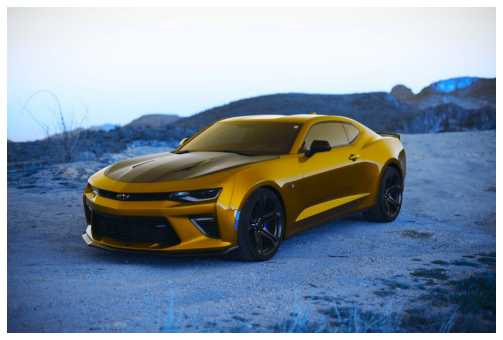

In [ ]:
# build a transformation matrix
# Notice that the matrix below won't change the image at all (identity matrix)
matrix = [[1, 0, 0], #x 
          [0, 1, 0]] #y
t = np.float32(matrix)# get the sizes
h, w = image_arr.shape[:2]# transform
img = cv.warpAffine(image_arr, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

### Translation 

Notice the values of the transformation matrix:

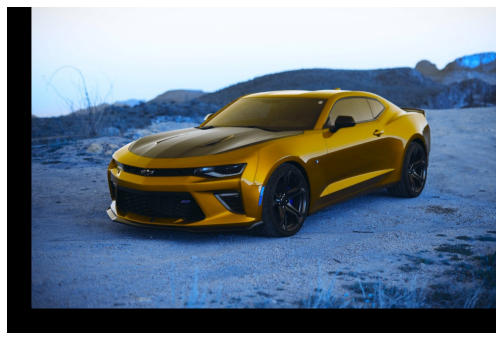

In [ ]:
matrix = [[1, 0, 50], #x 
          [0, 1, -50]] #y
t = np.float32(matrix)# get the sizes
h, w = image_arr.shape[:2]# transform
img = cv.warpAffine(image_arr, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

### Rotation

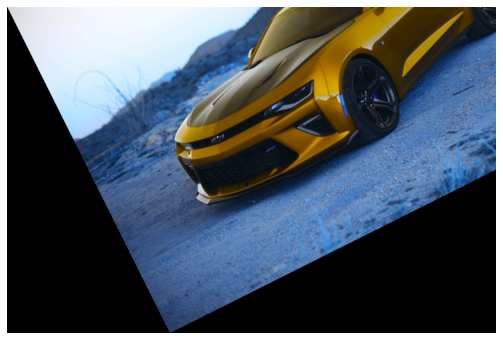

In [ ]:
matrix = [[1, 0.5, 0], #x 
          [-0.5, 1, 0]] #y
t = np.float32(matrix)# get the sizes
h, w = image_arr.shape[:2]# transform
img = cv.warpAffine(image_arr, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

### OpenCV

Notice that OpenCV has some easier ways to apply the transformation. For example, the method getRotationMatrix2D, where we can set the desired location of the image, the rotation in angles, and the scaling factor in a single method.

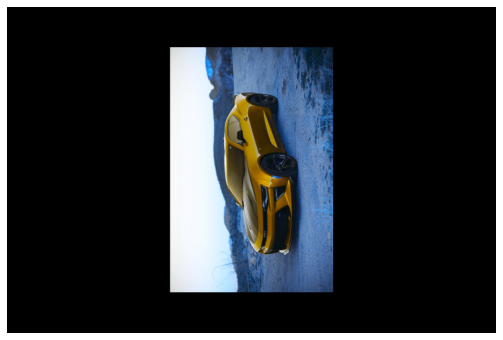

In [ ]:
h, w = image_arr.shape[:2]# 
# centre of the image (rotate 90 and scale by half)
T = cv.getRotationMatrix2D((w/2, h/2), 90, .5)
img = cv.warpAffine(image_arr, T, (w, h))
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

Flip, is another handy way to transform images. This can be achieved using the *.flip* method. You need an image, and decided the direction to reflect the image arround. Below, we flip the image on the y axis:

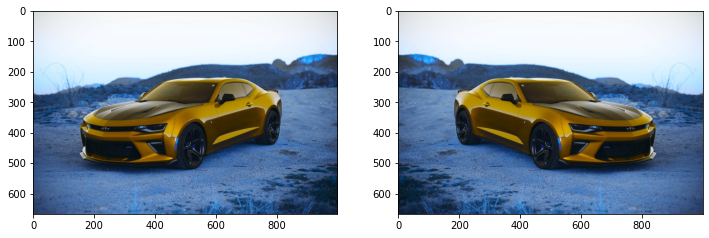

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12))
ax = plt.subplot(221) 
plt.imshow(image_arr)


img2 = cv.flip(image_arr, 1)
ax = plt.subplot(222) 
plt.imshow(img2)


**Task**: In the above code, set the second argument of the .*flip* function to 0, -1 respectively, and see the effects. 

## Filters 

Filtering is a convolution operation of two arrays (images), the original image, and the *filter* or kernel. At any point, $(u, v )$ in the original
image, the corresponding output pixel will be the sum of products of the
filter coefficients and the image pixels encompassed by the filter. Recall, that we also said that  Filters have different shapes and sizes
(i.e. 3 × 3, 5 × 5, etc..).


For example, removing noise from an image using low pass filters such as mean, median and Gaussian filters. Recall, that the process is simply like sliding the filter over the image. A typical $3 \times 3$ filter looks as follows: 

$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$


Applying the different  types of filters (discussed in the class) using openCV is straight forward:
    

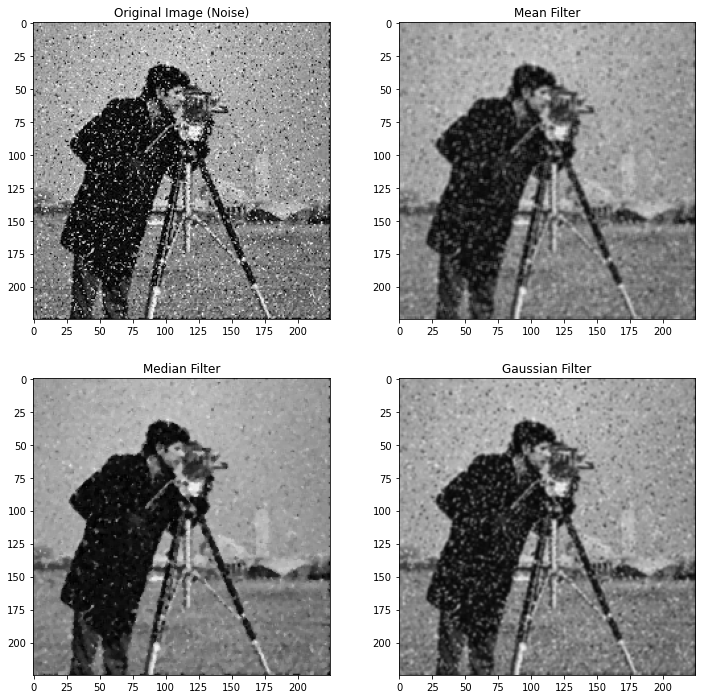

In [ ]:

img = cv.imread('/content/gdrive/My Drive/Data/filters.jpeg')

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
plt.imshow(img)

# apply mean filter 
meanF = cv.blur(img,(3,3))
ax2 = fig.add_subplot(222)
plt.imshow(meanF)

# apply median filter 
medianF = cv.medianBlur(img,3)
ax3 = fig.add_subplot(223)
plt.imshow(medianF)

# apply Gaussian Filter

GaussF = cv.GaussianBlur(img, (3,3),0)
ax4 = fig.add_subplot(224)
plt.imshow(GaussF)
ax1.title.set_text('Original Image (Noise)')
ax2.title.set_text('Mean Filter')
ax3.title.set_text('Median Filter')
ax4.title.set_text('Gaussian Filter')
plt.show()


**Tasks**: 

* Change some of the parameters of the filtering methods above and observe changes
* Check OpenCV documentation for more information about these filters and other examples as well: [https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

You should have noticed that for example the size of the filter affects the amount the image is blurred. Check the code below, where we change the mean filter size from $(3 \times 3)$ to $5 \times 5$, $7\times 7$, etc... :

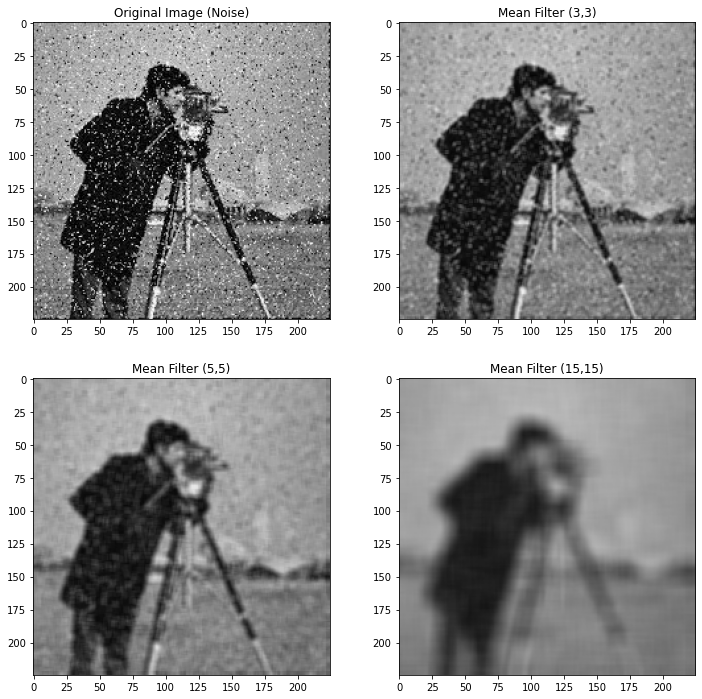

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
plt.imshow(img)

# use 3 by 3 filter 
meanF = cv.blur(img,(3,3))
ax2 = fig.add_subplot(222)
plt.imshow(meanF)

# use 5 by 5 filter 
meanF = cv.blur(img,(5,5))
ax3 = fig.add_subplot(223)
plt.imshow(meanF)

# use 15 by 15 filter 
meanF = cv.blur(img,(15,15))
ax4 = fig.add_subplot(224)
plt.imshow(meanF)


ax1.title.set_text('Original Image (Noise)')
ax2.title.set_text('Mean Filter (3,3)')
ax3.title.set_text('Mean Filter (5,5)')
ax4.title.set_text('Mean Filter (15,15)')
plt.show()

## Image Gradient and Edge Detection

The image gradient calculates the change in pixel intensity in both directions (horizontal and vertical) by performing convolution operation on the image with a kernel (filter). Often the kernel values are chosen so that two rows or columns have opposite signs. As discussed in the class, this could be achieved by various kernels:

* Horizontal Kernal can be defined as $$\begin{bmatrix} -1 & -1 & -1 \\ 2 & 2 & 2 \\ -1 & -1 & -1 \end{bmatrix}$$
* Vertical Kernal can be defined as $$\begin{bmatrix} -1 & 2 & -1 \\ -1 & 2 & -1 \\ -1 & 2 & -1 \end{bmatrix}$$



* It should be noted that image gradients played a central role in traditional computer vision methods, where the gradients are calculated in the x and y directions 
* And using the gradients, important features can be extracted e.g. edges, corner points, etc...Edges can be detected by calculating the gradient in the x and y directions. 
* The gradient for detecting the edges is achieved by applying certain filters (kernels) to the image. Various common methods are available and can  be applied using different kernels (check lecture notes for kernels of the different methods).

The code below loads an image and applies various edge detectors: 

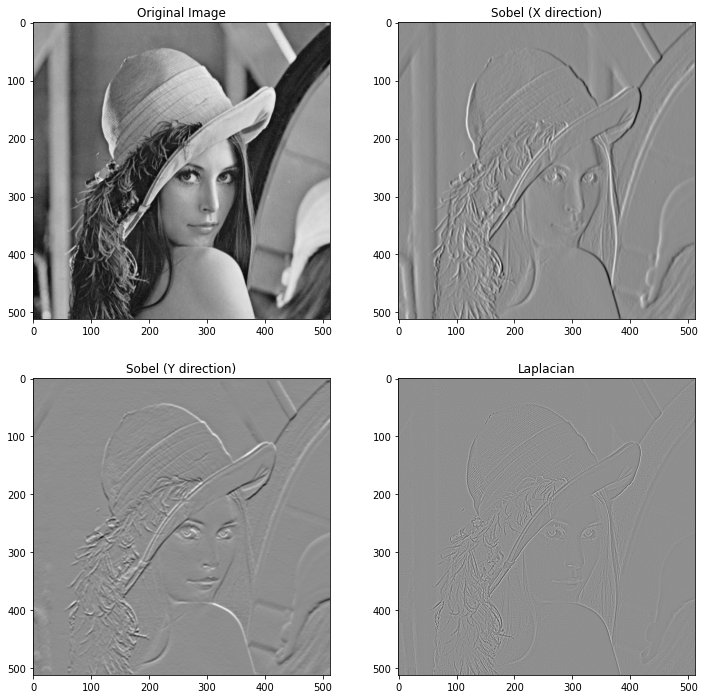

In [ ]:
# load the image as grayscale
img = cv.imread('/content/gdrive/My Drive/Data/lena.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
plt.imshow(gray,cmap='gray')


## edges in the x direction 
sobelx = cv.Sobel(gray,cv.CV_64F,1,0,ksize=5)
ax2 = fig.add_subplot(222)
plt.imshow(sobelx,cmap='gray')

## edges in the y direction 
sobely = cv.Sobel(gray,cv.CV_64F,0,1,ksize=5)
ax3 = fig.add_subplot(223)
plt.imshow(sobely,cmap='gray')

# Laplacian edge detectors

laplacian = cv.Laplacian(gray,cv.CV_64F)
ax4 = fig.add_subplot(224)
plt.imshow(laplacian,cmap='gray')


ax1.title.set_text('Original Image')
ax2.title.set_text('Sobel (X direction)')
ax3.title.set_text('Sobel (Y direction)')
ax4.title.set_text('Laplacian')


One very common edge detection algorithm is the **Canny** edge algorithm, which again can be implemented easily using openCV 

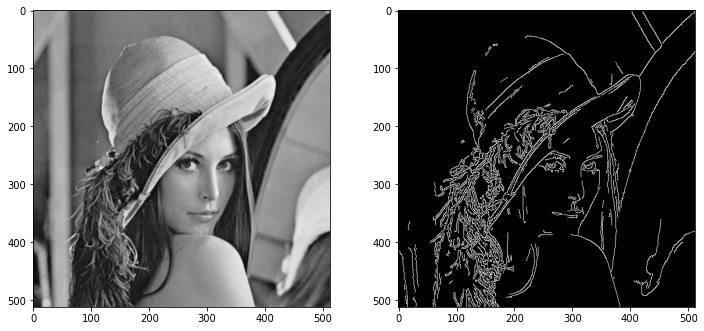

In [ ]:
img = cv.imread('/content/gdrive/My Drive/Data/lena.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
plt.imshow(gray,cmap='gray')


## Canny edge  
edges = cv.Canny(gray,100,200)
ax2 = fig.add_subplot(222)
plt.imshow(edges,cmap='gray')


### Morphological Operations

There is wide range of image processing methods, but one common set of methods are called morphological operations. These are applied to images. Follow the link here for more details [https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html)

Two common morphological methods are **erosion** and **dilation**, best explained with an example: 

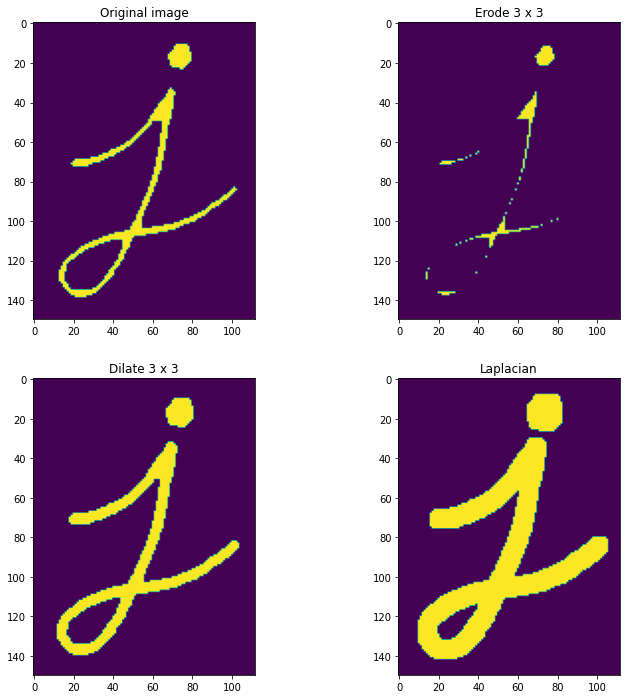

In [ ]:
img = cv.imread('/content/gdrive/My Drive/Data/morph.png',0)

#create a strcutruing element with size 5 by 5 and apply erosion
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img, kernel, iterations=1)


# apply dilation to the image 
dilation = cv.dilate(img, kernel,iterations=1)


# Increaes the size of the structuring element dilate 
kernel = np.ones((7,7),np.uint8)
dilation7 = cv.dilate(img, kernel,iterations=1)

# Show results 
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
plt.imshow(img)


## Erode with 3 x 3 kernel 
ax2 = fig.add_subplot(222)
plt.imshow(erosion)

## Dilate with 3 x 3 kernel 
ax3 = fig.add_subplot(223)
plt.imshow(dilation)

# Dilate with 7 x 7 kernel

ax4 = fig.add_subplot(224)
plt.imshow(dilation7)


ax1.title.set_text('Original image')
ax2.title.set_text('Erode 3 x 3')
ax3.title.set_text('Dilate 3 x 3')
ax4.title.set_text('Laplacian')